In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/hotel_guests_dataset (1).csv')
data

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23 00:00:00.000000000,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401.0,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16 00:00:00.000000000,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058.0,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07 00:00:00.000000000,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565.0,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08 00:00:00.000000000,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350.0,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27 00:00:00.000000000,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176.0,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24 00:00:00.000000000,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,377 Thomas Forks Apt. 288,North Sean,ME,41583.0,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23 00:00:00.000000000,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,USNV Thompson,South Christopher,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28 00:00:00.000000000,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,16836 Gonzalez Plain,Lake Hollyberg,AZ,47272.0,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31 00:00:00.000000000,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,9937 Katie Drives Suite 319,Andrademouth,VT,56046.0,"Andrademouth, VT 56046"


In [ ]:
data = pd.read_csv('/content/hotel_guests_dataset (1).csv')

data[['street_address', 'city', 'state', 'zip_code']] = data['billing_address'].str.extract(
    r'(.*?),?\s*(?:Suite|Apt\.|Unit)?.+?\n(.*?),\s*([A-Z]{2})\s*(\d{5})')

# Untuk baris yang tidak memiliki Suite/Apt./Unit
data.loc[data['street_address'].isna(), ['street_address', 'city', 'state', 'zip_code']] = data['billing_address'].str.extract(
    r'(.*?)\n(.*?),\s*([A-Z]{2})\s*(\d{5})')

# Bersihkan spasi yang tidak perlu
data['street_address'] = data['street_address'].str.strip()
data['city'] = data['city'].str.strip()
data['state'] = data['state'].str.strip()
data['zip_code'] = data['zip_code'].str.strip()

# Tampilkan hasil
print(data[['street_address', 'city', 'state', 'zip_code']].head())

# Jika ingin menyimpan hasil ke file CSV baru
data.to_csv('processed_data.csv', index=False)

  street_address         city state zip_code
0                   Susanberg    NC    28401
1                    West Amy    NM    25058
2                 North Haley    TX    76565
3                  Thomasland    OH    61350
4                   Duranstad    MS    95176


In [ ]:
len(data)

2000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2000 non-null   int64  
 1   guest_email         2000 non-null   object 
 2   has_rewards         2000 non-null   bool   
 3   room_type           2000 non-null   object 
 4   amenities_fee       2000 non-null   float64
 5   checkin_date        2000 non-null   object 
 6   checkout_date       2000 non-null   object 
 7   room_rate           2000 non-null   float64
 8   billing_address     2000 non-null   object 
 9   credit_card_number  2000 non-null   int64  
 10  street_address      1772 non-null   object 
 11  city                1772 non-null   object 
 12  state               1772 non-null   object 
 13  zip_code            1772 non-null   object 
 14  city_state_zip      2000 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(10)
memory usa

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


In [ ]:
data.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23 00:00:00.000000000,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16 00:00:00.000000000,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07 00:00:00.000000000,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08 00:00:00.000000000,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27 00:00:00.000000000,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,,Duranstad,MS,95176,"Duranstad, MS 95176"


In [ ]:
amenities_fee = data['amenities_fee'].mean()
data['amenities_fee'].fillna(amenities_fee, inplace=True)
data

<ipython-input-136-1bdde6808a00>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amenities_fee'].fillna(amenities_fee, inplace=True)


,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23 00:00:00.000000000,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16 00:00:00.000000000,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07 00:00:00.000000000,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08 00:00:00.000000000,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27 00:00:00.000000000,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24 00:00:00.000000000,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23 00:00:00.000000000,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,NaN,NaN,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28 00:00:00.000000000,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31 00:00:00.000000000,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


In [ ]:
# Ubah 'checkout_date' menjadi objek datetime
data['checkout_date'] = pd.to_datetime(data['checkout_date'])

# Sekarang Anda dapat menghitung mean (akan mengembalikan rata-rata waktu)
checkout_date = data['checkout_date'].mean()

# Jika Anda ingin mengisi nilai NaN dengan waktu rata-rata:
data['checkout_date'].fillna(checkout_date, inplace=True)
data

<ipython-input-138-709f39fc07ea>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['checkout_date'].fillna(checkout_date, inplace=True)


,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,NaN,NaN,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


In [ ]:
data

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,NaN,NaN,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
if 'billing_address' in data.columns:
    # Pisahkan alamat berdasarkan newline '\n'
    data[['street_address', 'city_state_zip']] = data['billing_address'].str.split('\n', expand=True)

    # Tampilkan hasil
    print(data[['billing_address', 'street_address', 'city_state_zip']].head())
else:
    print("Kolom 'billing_address' tidak ditemukan dalam dataset.")



                                     billing_address  \
0   90469 Karla Knolls Apt. 781\nSusanberg, NC 28401   
1     1080 Ashley Creek Apt. 622\nWest Amy, NM 25058   
2  99923 Anderson Trace Suite 861\nNorth Haley, T...   
3           9301 John Parkways\nThomasland, OH 61350   
4             126 George Tunnel\nDuranstad, MS 95176   

                   street_address         city_state_zip  
0     90469 Karla Knolls Apt. 781    Susanberg, NC 28401  
1      1080 Ashley Creek Apt. 622     West Amy, NM 25058  
2  99923 Anderson Trace Suite 861  North Haley, TX 76565  
3              9301 John Parkways   Thomasland, OH 61350  
4               126 George Tunnel    Duranstad, MS 95176  


In [ ]:
data

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,377 Thomas Forks Apt. 288,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,USNV Thompson,NaN,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,16836 Gonzalez Plain,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,9937 Katie Drives Suite 319,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
guest_email,0
has_rewards,0
room_type,0
amenities_fee,0
checkin_date,0
checkout_date,0
room_rate,0
billing_address,0
credit_card_number,0


In [ ]:
city_mode = data['city'].mode()[0]

data['city'].fillna(city_mode, inplace=True)
data

<ipython-input-144-896f3c182fb6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['city'].fillna(city_mode, inplace=True)


,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,377 Thomas Forks Apt. 288,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,USNV Thompson,South Christopher,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,16836 Gonzalez Plain,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,9937 Katie Drives Suite 319,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
data.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176,"Duranstad, MS 95176"


In [ ]:
# Membuat DataFrame
data = pd.DataFrame(data)

# Menyimpan DataFrame ke file CSV baru
data.to_csv('/content/hotel_guests_dataset (1).csv', index=False)

In [ ]:
data


,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,377 Thomas Forks Apt. 288,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,USNV Thompson,South Christopher,NaN,NaN,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,16836 Gonzalez Plain,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,9937 Katie Drives Suite 319,Andrademouth,VT,56046,"Andrademouth, VT 56046"


In [ ]:
state_mode = data['state'].mode()[0]

data['state'].fillna(state_mode, inplace=True)

state_mode = data['city'].mode()[0]

data['city'].fillna(state_mode, inplace=True)

data['zip_code'] = data['zip_code'].astype(str)

zip_code_mode = data['zip_code'].mode()[0]

data['zip_code'].fillna(zip_code_mode, inplace=True)
data

<ipython-input-148-929928cff761>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['state'].fillna(state_mode, inplace=True)
<ipython-input-148-929928cff761>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number,street_address,city,state,zip_code,city_state_zip
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,2020-04-23,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983,90469 Karla Knolls Apt. 781,Susanberg,NC,28401,"Susanberg, NC 28401"
1,1,steven59@example.org,False,BASIC,18.625723,27 Jun 2020,2020-08-16,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690,1080 Ashley Creek Apt. 622,West Amy,NM,25058,"West Amy, NM 25058"
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,2020-04-07,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788,99923 Anderson Trace Suite 861,North Haley,TX,76565,"North Haley, TX 76565"
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,2020-06-08,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485,9301 John Parkways,Thomasland,OH,61350,"Thomasland, OH 61350"
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,2019-10-27,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978,126 George Tunnel,Duranstad,MS,95176,"Duranstad, MS 95176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,valerie83@example.org,False,BASIC,9.377198,22 Sep 2020,2020-09-24,110.402139,"377 Thomas Forks Apt. 288\nNorth Sean, ME 41583",2551419503001787,377 Thomas Forks Apt. 288,North Sean,ME,41583,"North Sean, ME 41583"
1996,1996,hartdaniel@example.org,False,BASIC,18.580052,03 Sep 2020,2020-09-23,132.147103,USNV Thompson\nFPO AE 99295,30545507259735,USNV Thompson,South Christopher,VA,nan,FPO AE 99295
1997,1997,fbaker@example.org,False,BASIC,20.228473,26 Jan 2021,2021-02-28,203.245188,"16836 Gonzalez Plain\nLake Hollyberg, AZ 47272",2258564950501684,16836 Gonzalez Plain,Lake Hollyberg,AZ,47272,"Lake Hollyberg, AZ 47272"
1998,1998,jenniferbradley@example.org,False,BASIC,8.730536,27 Jul 2020,2020-07-31,103.702257,"9937 Katie Drives Suite 319\nAndrademouth, VT ...",4626487361085121933,9937 Katie Drives Suite 319,Andrademouth,VT,56046,"Andrademouth, VT 56046"


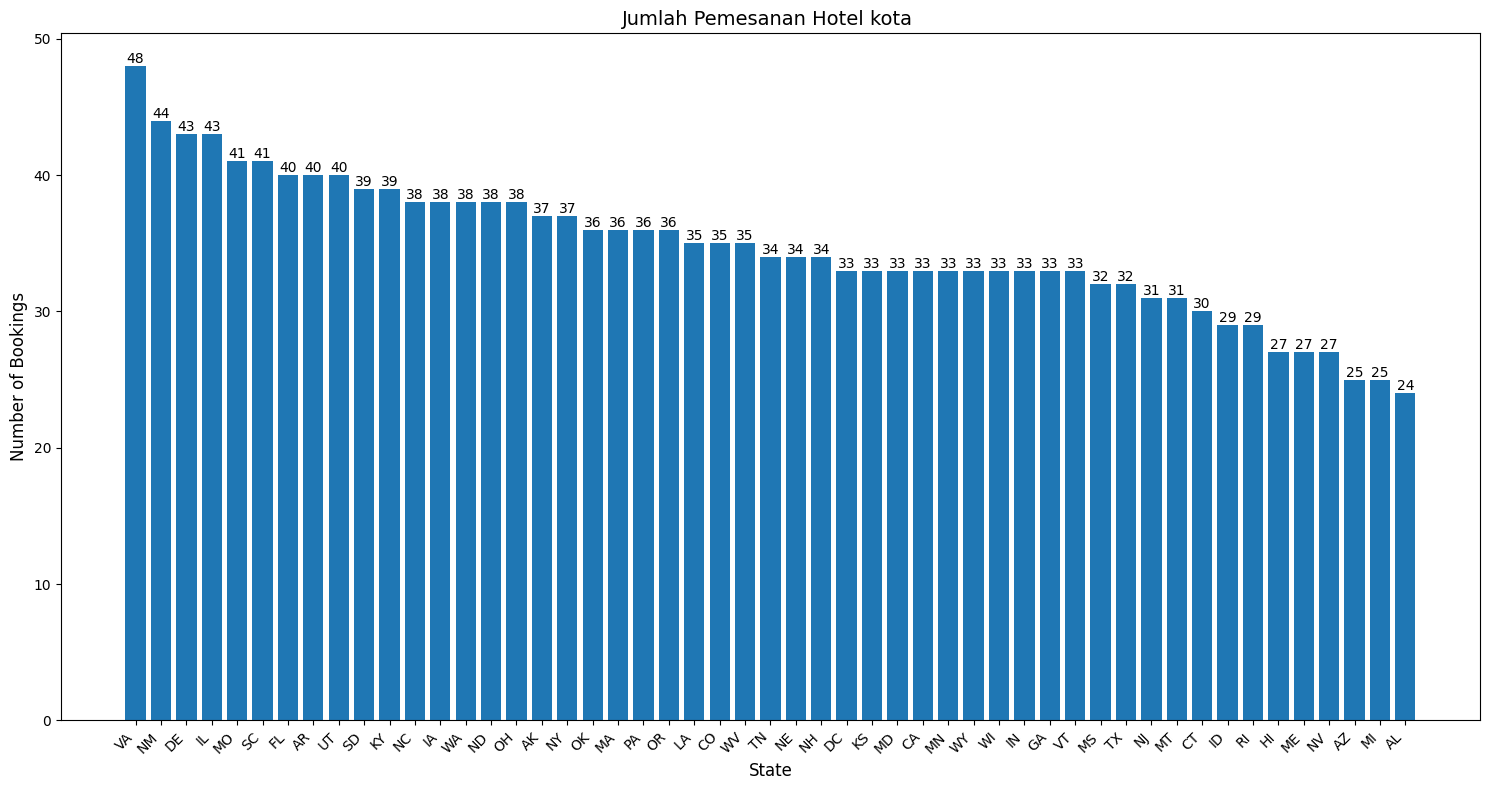

In [ ]:

data = pd.read_csv('/content/hotel_guests_dataset (1).csv')


state_counts = data['state'].value_counts()


plt.figure(figsize=(15,8))
plt.bar(state_counts.index, state_counts.values)


plt.title('Jumlah Pemesanan Hotel kota ', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45, ha='right')


for i, v in enumerate(state_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
kode_kota_count = data['state'].value_counts()

print(kode_kota_count)


state
VA    48
NM    44
DE    43
IL    43
MO    41
SC    41
FL    40
AR    40
UT    40
SD    39
KY    39
NC    38
IA    38
WA    38
ND    38
OH    38
AK    37
NY    37
OK    36
MA    36
PA    36
OR    36
LA    35
CO    35
WV    35
TN    34
NE    34
NH    34
DC    33
KS    33
MD    33
CA    33
MN    33
WY    33
WI    33
IN    33
GA    33
VT    33
MS    32
TX    32
NJ    31
MT    31
CT    30
ID    29
RI    29
HI    27
ME    27
NV    27
AZ    25
MI    25
AL    24
Name: count, dtype: int64


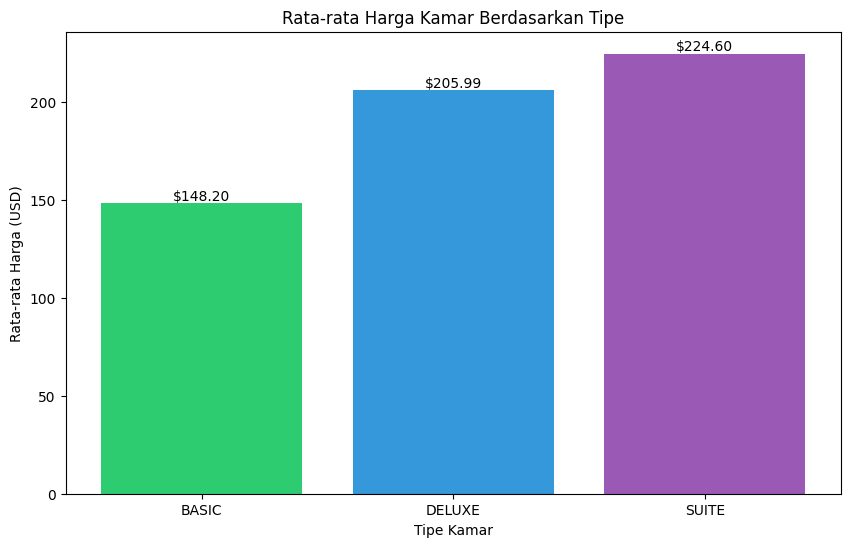

In [ ]:
data = pd.read_csv('/content/hotel_guests_dataset (1).csv')

plt.figure(figsize=(10,6))
rata_harga = data.groupby('room_type')['room_rate'].mean()
plt.bar(rata_harga.index, rata_harga.values, color=['#2ecc71','#3498db','#9b59b6'])
plt.title('Rata-rata Harga Kamar Berdasarkan Tipe')
plt.xlabel('Tipe Kamar')
plt.ylabel('Rata-rata Harga (USD)')
for i, v in enumerate(rata_harga.values):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')
plt.show()

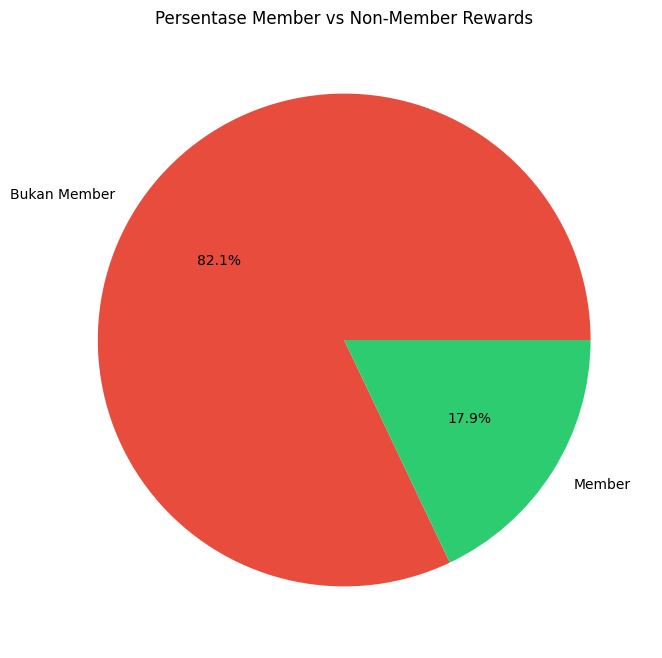

In [ ]:
data = pd.read_csv('/content/hotel_guests_dataset (1).csv')

plt.figure(figsize=(8,8))
distribusi_member = data['has_rewards'].value_counts()
plt.pie(distribusi_member.values,
        labels=['Bukan Member','Member'],
        autopct='%1.1f%%',
        colors=['#e74c3c','#2ecc71'])
plt.title('Persentase Member vs Non-Member Rewards')
plt.show()

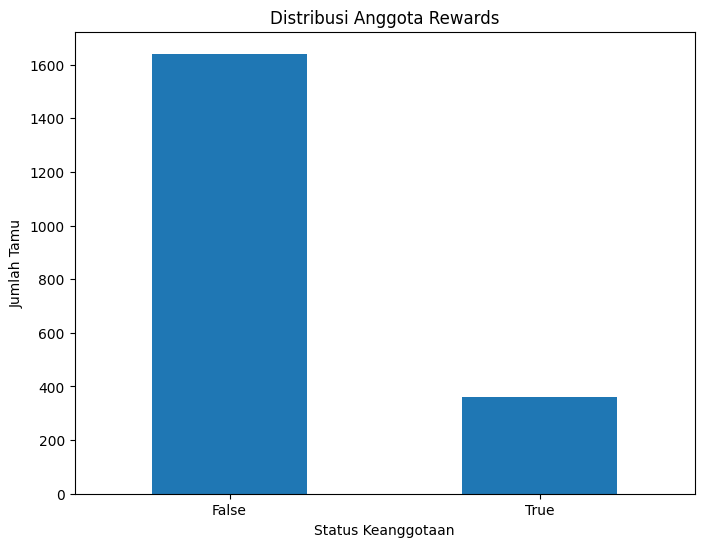

In [ ]:
# Diagram Batang Status Keanggotaan
plt.figure(figsize=(8,6))
data['has_rewards'].value_counts().plot(kind='bar')
plt.title('Distribusi Anggota Rewards')
plt.xlabel('Status Keanggotaan')
plt.ylabel('Jumlah Tamu')
plt.xticks(rotation=0)
plt.show()

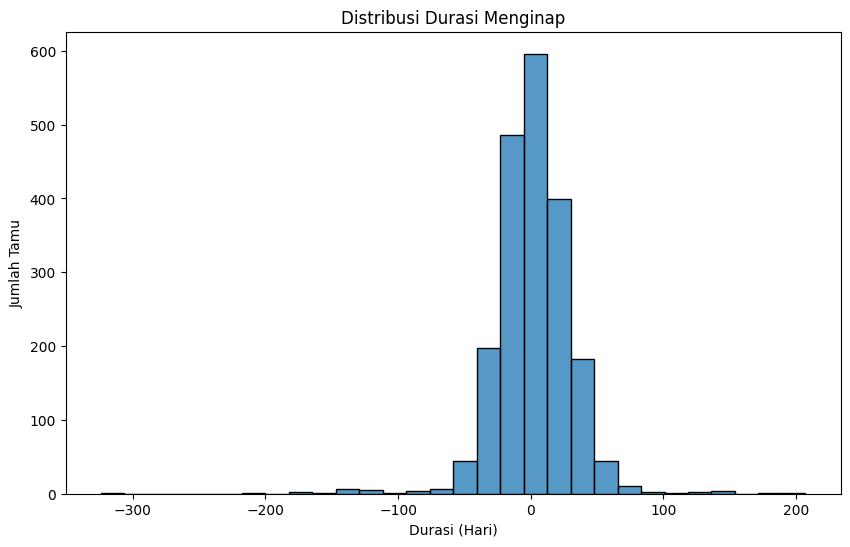

In [ ]:
# Menghitung durasi menginap
data['duration'] = (pd.to_datetime(data['checkout_date']) -
                 pd.to_datetime(data['checkin_date'])).dt.days

# Histogram Durasi Menginap
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='duration', bins=30)
plt.title('Distribusi Durasi Menginap')
plt.xlabel('Durasi (Hari)')
plt.ylabel('Jumlah Tamu')
plt.show()

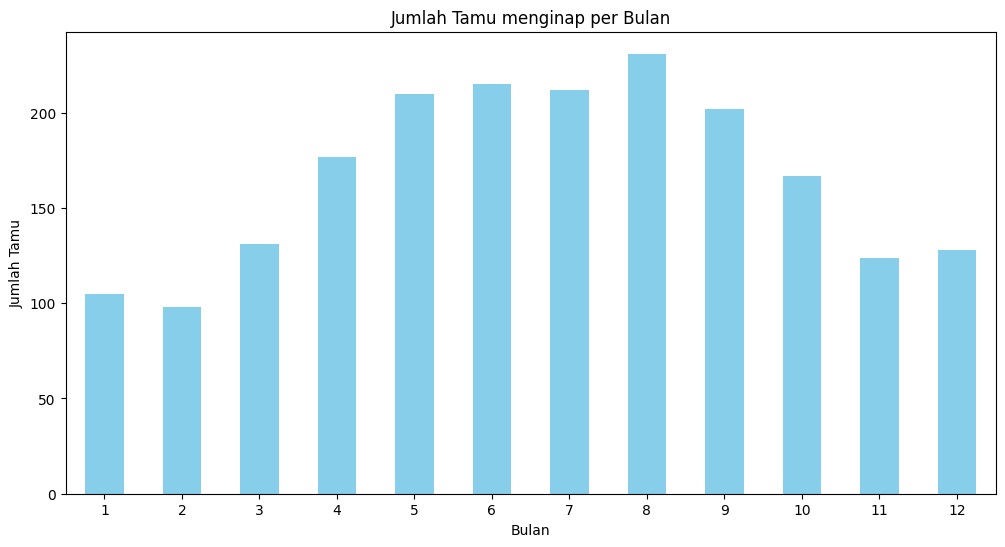

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['checkin_date'] = pd.to_datetime(data['checkin_date'])

# Menghitung jumlah tamu per bulan
monthly_guests = data['checkin_date'].dt.month.value_counts().sort_index()

plt.figure(figsize=(12,6))
monthly_guests.plot(kind='bar', color='skyblue')
plt.title('Jumlah Tamu menginap per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Tamu')
plt.xticks(rotation=0)
plt.show()

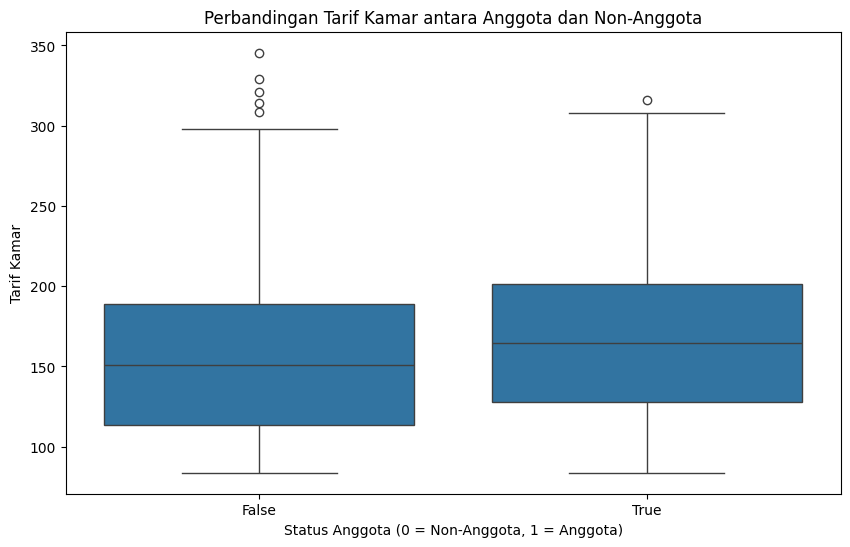

In [ ]:
# Box plot perbandingan tarif kamar antara anggota dan non-anggota
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='has_rewards', y='room_rate')
plt.title('Perbandingan Tarif Kamar antara Anggota dan Non-Anggota')
plt.xlabel('Status Anggota (0 = Non-Anggota, 1 = Anggota)')
plt.ylabel('Tarif Kamar')
plt.show()

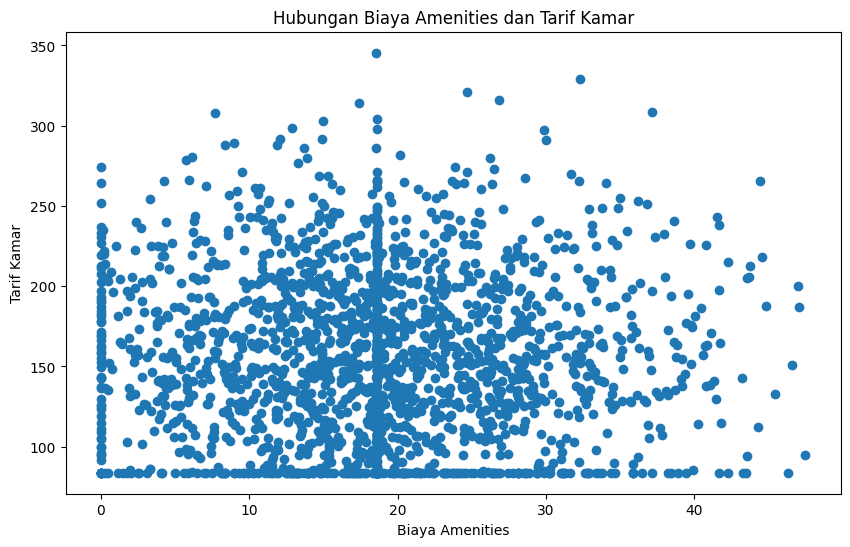

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['amenities_fee'], data['room_rate']) # Changed df to data
plt.title('Hubungan Biaya Amenities dan Tarif Kamar')
plt.xlabel('Biaya Amenities')
plt.ylabel('Tarif Kamar')
plt.show()

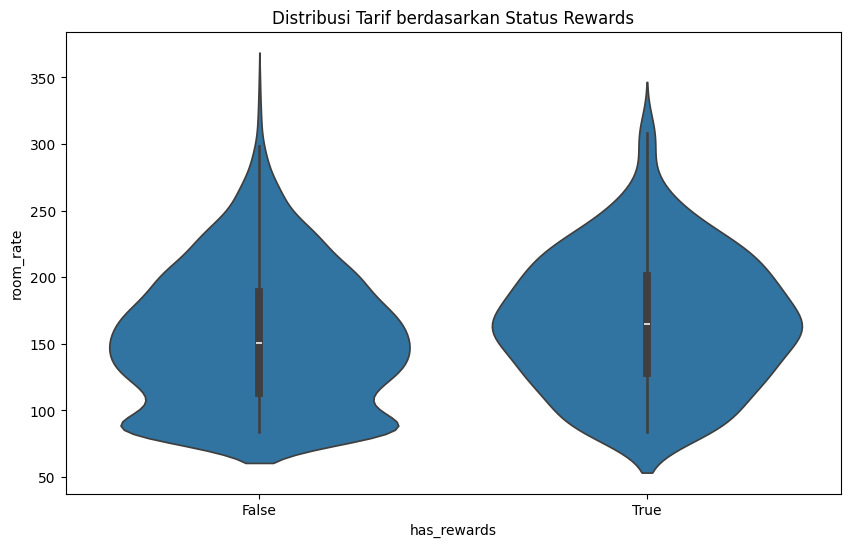

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='has_rewards', y='room_rate', data=data) # Changed df to data
plt.title('Distribusi Tarif berdasarkan Status Rewards')
plt.show()

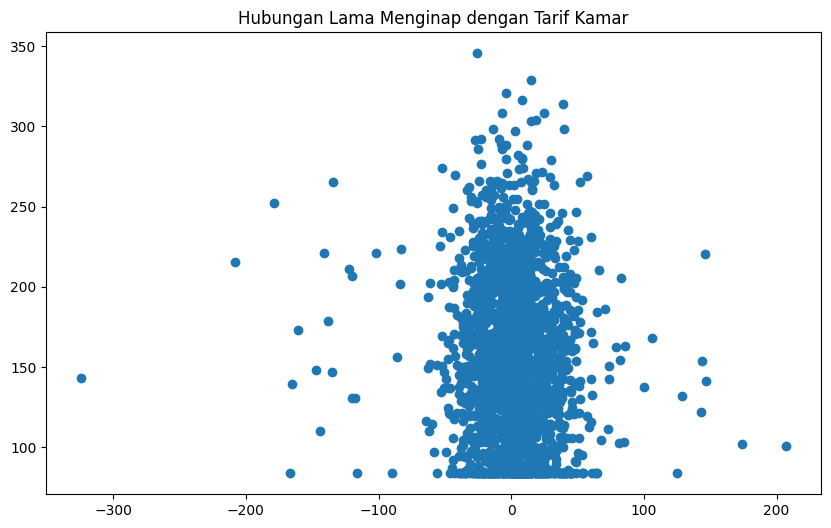

In [ ]:
plt.figure(figsize=(10, 6))
stay_duration = (pd.to_datetime(data['checkout_date']) - pd.to_datetime(data['checkin_date'])).dt.days # Changed df to data
plt.scatter(stay_duration, data['room_rate'])
plt.title('Hubungan Lama Menginap dengan Tarif Kamar')
plt.show()

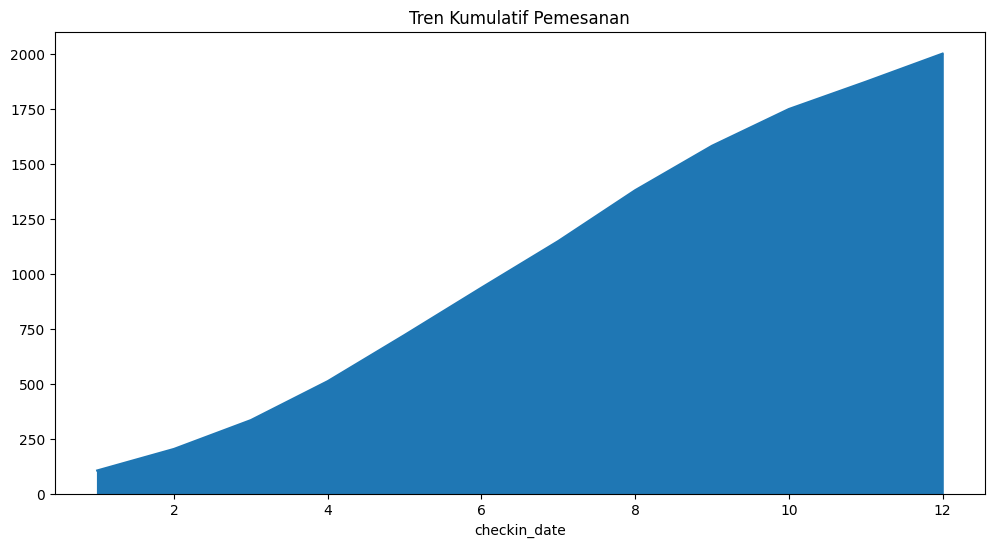

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby(pd.to_datetime(data['checkin_date']).dt.month).size().cumsum().plot(kind='area')
plt.title('Tren Kumulatif Pemesanan')
plt.show()